# Setup

In [1]:
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [5]:
YOUTUBE_VIDEO = "https://www.youtube.com/watch?v=cdiD-9MMpb0"

# First Simple Chain

## LLM Model

In [6]:
from langchain_openai.chat_models import ChatOpenAI

In [9]:
# OPENAI_API_KEY is automatically sourced
model = ChatOpenAI(model="gpt-3.5-turbo")

In [10]:
# Example of query
model.invoke("What MLB team won the World Series during the COVID-19 pandemic?")

AIMessage(content='The Los Angeles Dodgers won the World Series during the COVID-19 pandemic in 2020. They defeated the Tampa Bay Rays in a six-game series to claim their first championship since 1988.', response_metadata={'token_usage': {'completion_tokens': 40, 'prompt_tokens': 21, 'total_tokens': 61}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-d052d652-eb58-4ec1-8105-d362f9d4baa6-0', usage_metadata={'input_tokens': 21, 'output_tokens': 40, 'total_tokens': 61})

## Output Parser

The result from the model is an `AIMessage` instance containing the answer. We can extract this answer by chaining the model with an [**output parser**](https://python.langchain.com/docs/modules/model_io/output_parsers/).

Here is what chaining the model with an output parser looks like:
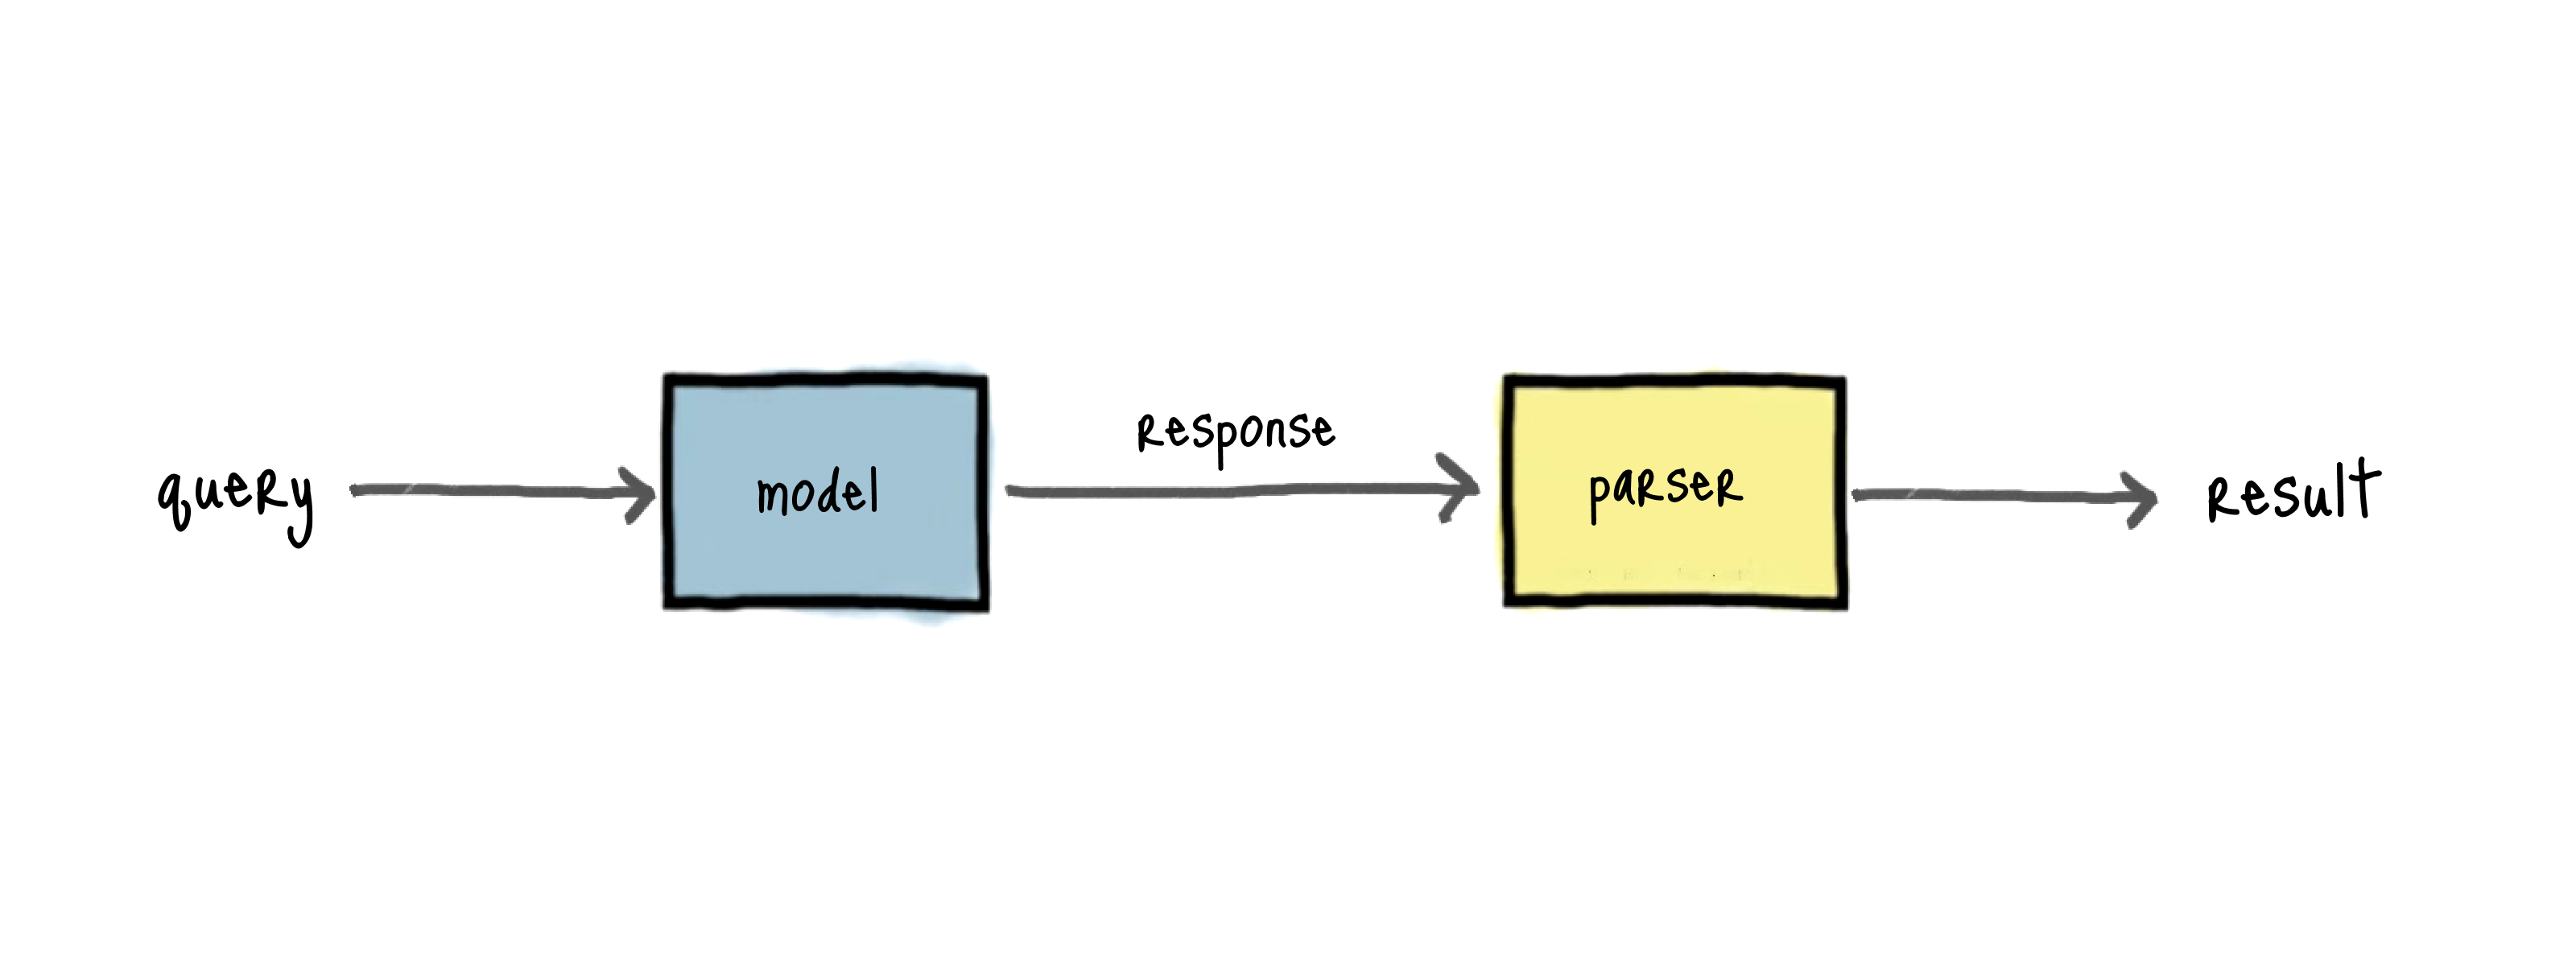

For this example, we'll use a simple `StrOutputParser` to extract the answer as a string.

In [19]:
from langchain_core.output_parsers import StrOutputParser

In [20]:
parser = StrOutputParser()

chain = model | parser

In [21]:
chain

ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x784fcd0189a0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x784fccf19330>, openai_api_key=SecretStr('**********'), openai_proxy='')
| StrOutputParser()

In [22]:
chain.invoke("What MLB team won the World Series during the COVID-19 pandemic?")

'The Los Angeles Dodgers won the World Series during the COVID-19 pandemic, defeating the Tampa Bay Rays in six games in October 2020.'

## Chat Prompt Template

In [11]:
from langchain.prompts import ChatPromptTemplate

In [14]:
template = """
Answer the question based on the context below. If you can't \
answer the question, reply "I don't know".

Context: {context}

Question: {question}
"""

In [16]:
print(template)


Answer the question based on the context below. If you can't answer the question, reply "I don't know".

Context: {context}

Question: {question}



In [17]:
prompt = ChatPromptTemplate.from_template(template)
prompt.format(context="Mary's sister is Susana.", question="Who is Mary's sister?")

'Human: \nAnswer the question based on the context below. If you can\'t answer the question, reply "I don\'t know".\n\nContext: Mary\'s sister is Susana.\n\nQuestion: Who is Mary\'s sister?\n'

We can now chain the prompt with the model and the output parser.
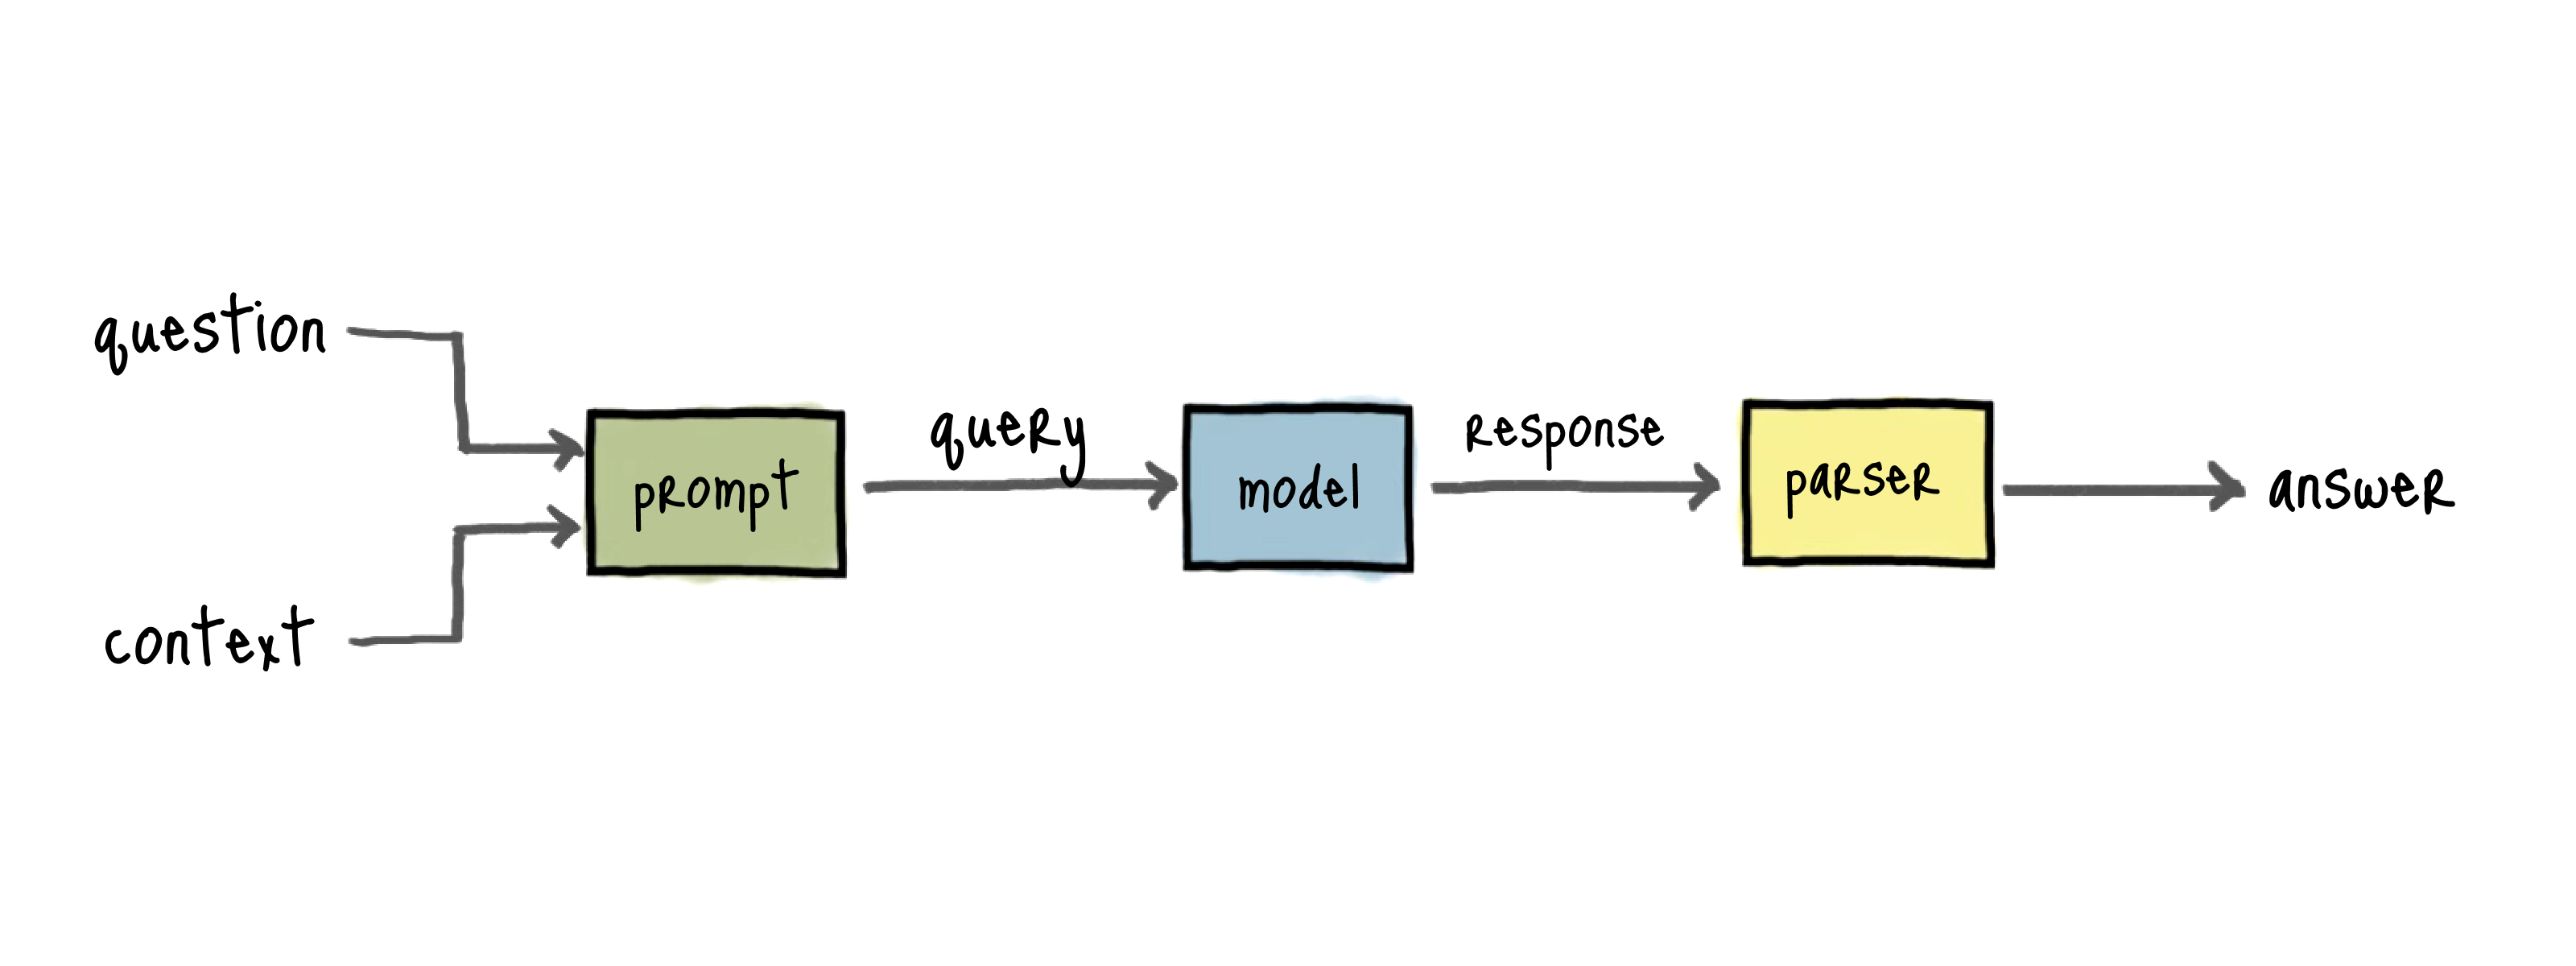

In [23]:
chain = prompt | model | parser

In [24]:
chain

ChatPromptTemplate(input_variables=['context', 'question'], messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], template='\nAnswer the question based on the context below. If you can\'t answer the question, reply "I don\'t know".\n\nContext: {context}\n\nQuestion: {question}\n'))])
| ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x784fcd0189a0>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x784fccf19330>, openai_api_key=SecretStr('**********'), openai_proxy='')
| StrOutputParser()

In [25]:
chain.invoke({
    "context": "Mary's sister is Susana",
    "question": "Who is Mary's sister?"
})

'Susana'